# Model Training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [2]:
import sys
print (sys.executable)

/Users/lileo/Documents/projects/starbucks_ml/venv/bin/python3


In [3]:
X_1 = pd.read_csv('training_data/feature_group_1.csv', index_col='id')
X_2 = pd.read_csv('training_data/feature_group_2.csv', index_col='id')

y = pd.read_csv('training_data/target.csv', index_col='id')

In [4]:
common_index = set(X_1.index).intersection(set(y.index))
common_index = common_index.intersection(set(X_2.index))

## Extra Cleaning

In [5]:
for row in y.index:
    if row not in common_index:
        y.drop(row, axis=0, inplace=True)

for row in X_1.index:
    if row not in common_index:
        X_1.drop(row, axis=0, inplace=True)
        
for row in X_2.index:
    if row not in common_index:
        X_2.drop(row, axis=0, inplace=True)

In [6]:
for row in X_1.index:
    if X_1['gender'][row] == 'F':
        X_1.at[row, 'numeric_gender'] = 0
    else:
        X_1.at[row, 'numeric_gender'] = 1

X_1.drop('gender', axis=1, inplace=True)

### Feature Group 1 - Convert to numaric number

## Modeling Feature Group 1

In [7]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(np.asarray(X_1), y, test_size=0.20, random_state=10)

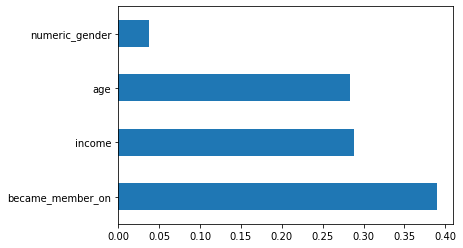

score: 0.2467937608318891


In [8]:
clf = RandomForestClassifier(n_estimators=100,
                             random_state=11,
                            min_samples_split=10)
clf.fit(X_train_1, y_train_1)  

feat_importances = pd.Series(clf.feature_importances_, index=X_1.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()
print('score:', clf.score(X_test_1, y_test_1))

## Modeling Feature Group 2

In [9]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(np.asarray(X_2), y, test_size=0.20, random_state=10)

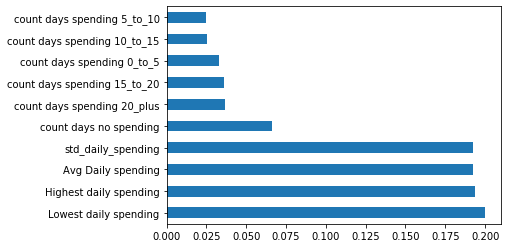

score: 0.24575389948006932


In [10]:
clf = RandomForestClassifier(n_estimators=100,
                             random_state=11,
                            min_samples_split=10)
clf.fit(X_train_2, y_train_2)  

feat_importances = pd.Series(clf.feature_importances_, index=X_2.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()
print('score:', clf.score(X_test_2, y_test_2))

## Modeling Feature both Groups

In [16]:
X = pd.concat((X_1, X_2), axis=1)
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.20, random_state=10)

/Users/lileo/Documents/projects/starbucks_ml/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


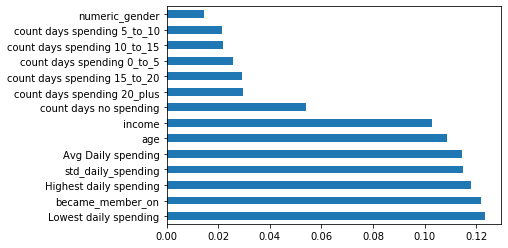

score: 0.24783362218370883


In [17]:
clf = RandomForestClassifier(n_estimators=100,
                             random_state=11,
                            min_samples_split=10)
clf.fit(X_train, y_train)  

feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()
print('score:', clf.score(X_test, y_test))